<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°07

**Objetivo**: Aplicar técnicas básicas de **Machine Learning** (tanto regresión como clasificación), desde la preparación de datos hasta el entrenamiento y evaluación de modelos.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.



## Regresión


<img src="https://cdn-icons-png.flaticon.com/512/2400/2400362.png" width = "300" align="center"/>


Los datos utilizados corresponden a propiedades localizadas en un distrito específico de California, junto con algunas estadísticas resumen extraídas del censo de 1990. Es importante tener en cuenta que los datos no han sido procesados previamente, por lo que será necesario realizar algunas etapas de limpieza y preprocesamiento.

Las columnas incluidas en el conjunto de datos son las siguientes (sus nombres son descriptivos):

* **longitude**: Longitud geográfica de la propiedad.
* **latitude**: Latitud geográfica de la propiedad.
* **housingmedianage**: Edad media de las viviendas en la zona.
* **total_rooms**: Número total de habitaciones.
* **total_bedrooms**: Número total de dormitorios.
* **population**: Población en el área circundante.
* **households**: Número de hogares en la zona.
* **median_income**: Ingreso medio por hogar.
* **medianhousevalue**: Valor medio de la propiedad.
* **ocean_proximity**: Proximidad al océano.

El objetivo de este análisis es predecir el valor medio de las propiedades utilizando las características proporcionadas.

Para completar este laboratorio, se recomienda seguir la siguiente rúbrica de trabajo:

1. **Definición del problema**: Clarificar el objetivo del análisis y los resultados esperados.
2. **Estadística descriptiva**: Resumir las principales características de los datos a través de medidas estadísticas.
3. **Visualización descriptiva**: Utilizar gráficos para explorar los datos y sus relaciones.
4. **Preprocesamiento**: Realizar los pasos necesarios de limpieza y transformación de los datos.
5. **Selección de modelo**: Comparar al menos cuatro modelos de predicción diferentes.
6. **Métricas y análisis de resultados**: Evaluar el rendimiento de los modelos utilizando métricas apropiadas.
7. **Visualización de resultados del modelo**: Crear gráficos que muestren el desempeño de los modelos.
8. **Conclusiones**: Resumir los hallazgos del análisis.

> **Nota**: Se anima a los estudiantes a desarrollar un análisis más profundo si lo desean. Pueden consultar como referencia el siguiente [enlace](https://www.kaggle.com/camnugent/california-housing-prices).

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def regression_metrics(df):
    """
    Aplicar las distintas métricas definidas
    :param df: DataFrame con las columnas: ['y', 'yhat']
    :return: DataFrame con las métricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['mae'] = [round(mean_absolute_error(y_true, y_pred), 4)]
    df_result['mse'] = [round(mean_squared_error(y_true, y_pred), 4)]
    df_result['rmse'] = [round(np.sqrt(mean_squared_error(y_true, y_pred)), 4)]
    df_result['mape'] = [round(mean_absolute_percentage_error(y_true, y_pred), 4)]
    df_result['smape'] = [round(2 * mean_absolute_percentage_error(y_true, y_pred) / (mean_absolute_percentage_error(y_true, y_pred) + 100), 4)]

    return df_result

In [9]:
from sklearn.datasets import fetch_california_housing

# Cargar los datos de housing
housing_data = fetch_california_housing(as_frame=True)

# Convertir los datos en un DataFrame de pandas
housing = housing_data['data']
housing['target'] = housing_data['target']

# Visualizar las primeras filas del DataFrame
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# 1. Definicion del problema

En este problema se entregan distintos indicadores que se esoeran que esten relacionados con el valor de una propiedad. El objetivo del modelo será lograr predecir el valor de la propiedad con respecto a los indicadores entregados.

# 2. Estadistica descriptiva

In [10]:
housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Notar que poseemos 20.640 datos, ademas de otras estadisticas para poder estandarizar la información.

# 3. Visualizacion descriptiva

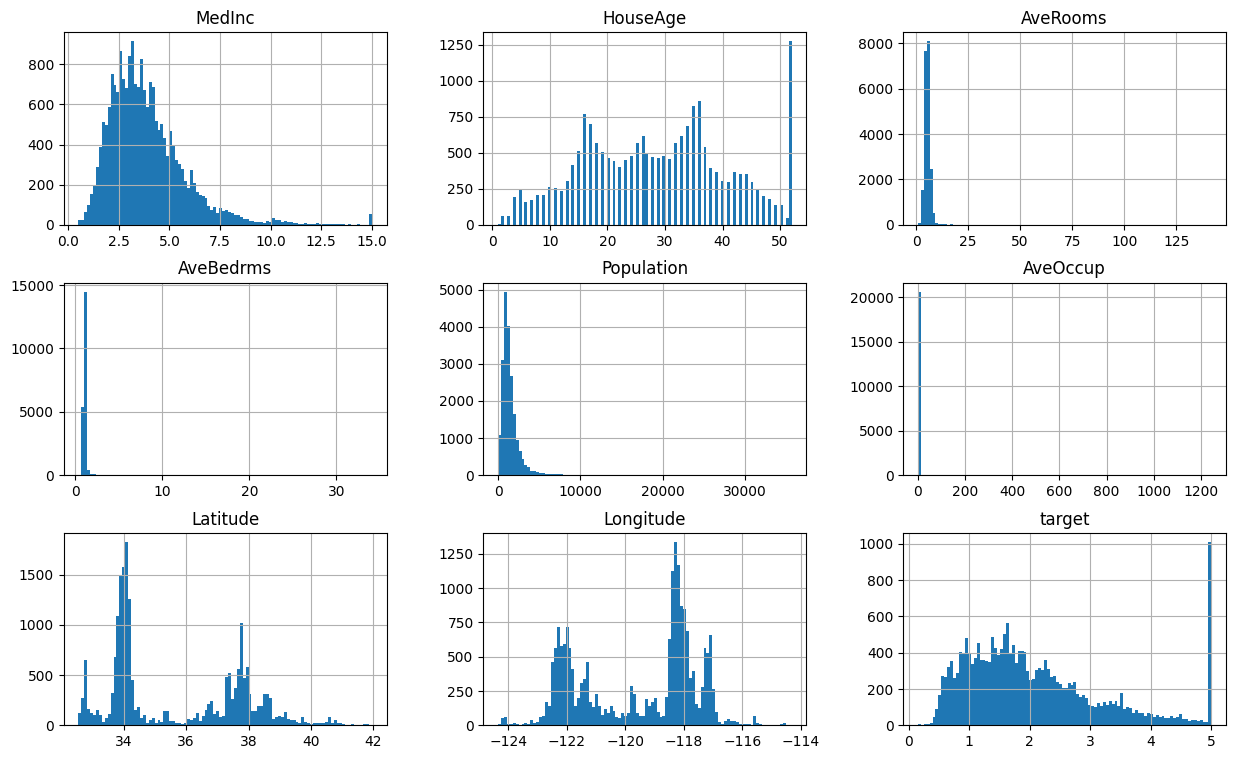

In [11]:
columnas = housing.iloc[0:2, :].columns

housing.iloc[:, :].hist(bins = 100, figsize= (15,9))
plt.show()

En estos graficos podemos notar que la mayor parte de los hogares esta cerca de la latitud 34 y longitud -118, la mayor parte de ellos posee entre 2 a 3 habitaciones y por ultimo se tiene una edad del hogar bastante dispersa pero con un claro pico en hogares con mas de 50 años.

# 4. Preprocesamiento

In [13]:
#eliminar outliners y estandarizacion
housing_clean = housing.copy()

for col in housing_clean.columns:
    Q1 = np.percentile(housing_clean[col], 25)
    Q3 = np.percentile(housing_clean[col], 75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    housing_clean = housing_clean[(housing_clean[col] >= lower) & (housing_clean[col] <= upper)]

housing_clean = (housing_clean - housing_clean.mean()) / housing_clean.std()

housing_clean.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
3,1.389746,1.853316,0.642968,0.397595,-1.137845,-0.512013,1.018191,-1.316257,1.608739
4,0.137599,1.853316,1.091046,0.519451,-1.126797,-1.097301,1.018191,-1.316257,1.618415
5,0.270416,1.853316,-0.375398,0.861941,-1.366708,-1.163692,1.018191,-1.316257,0.838917
6,0.007221,1.853316,-0.211169,-1.451087,-0.291843,-1.182045,1.013522,-1.316257,1.156092
7,-0.368444,1.853316,-0.340798,0.226918,-0.192406,-1.725288,1.013522,-1.316257,0.534644


# 5 Selección del modelo

Compararemos modelos de Regresion Lineal, Arboles de Decisión, SVM y Knn

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

X = housing_clean.drop('target', axis=1)
y = housing_clean['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Regresión Lineal
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

metrics_lr = regression_metrics(pd.DataFrame({'y': y_test, 'yhat': y_pred_lr}))
metrics_lr.index = ['Regresión Lineal']

# Árbol de Decisión

tree = DecisionTreeRegressor(random_state=42, max_depth=10)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

metrics_tree = regression_metrics(pd.DataFrame({'y': y_test, 'yhat': y_pred_tree}))
metrics_tree.index = ['Árbol de Decisión']

# SVM
svm = SVR(kernel='rbf', C=10, epsilon=0.1)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

metrics_svm = regression_metrics(pd.DataFrame({'y': y_test, 'yhat': y_pred_svm}))
metrics_svm.index = ['SVM']

# KNN
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

metrics_knn = regression_metrics(pd.DataFrame({'y': y_test, 'yhat': y_pred_knn}))
metrics_knn.index = ['KNN']


# 6. Métricas y análisis de resultados

In [17]:
results = pd.concat([metrics_lr, metrics_tree, metrics_svm, metrics_knn])
results

,mae,mse,rmse,mape,smape
Regresión Lineal,0.4565,0.3638,0.6031,352.9745,1.5585
Árbol de Decisión,0.4136,0.3627,0.6023,372.8100,1.5770
SVM,0.3590,0.2585,0.5084,333.3057,1.5384
KNN,0.4285,0.3487,0.5905,390.5647,1.5923


El modelo SVM presenta los valores más bajos en todas las métricas principales  lo que indica que logra las predicciones más precisas y con menor error promedio respecto a los valores reales.

El árbol de decisión muestra un rendimiento ligeramente inferior, aunque con resultados cercanos a la regresión lineal. Esto sugiere que el modelo logra captar cierta no linealidad en los datos, pero podría estar limitado por su profundidad o configuración.

La regresión lineal obtiene errores más altos, lo cual indica que la relación entre las variables no es completamente lineal y que existen patrones más complejos que este modelo no logra capturar adecuadamente.

El modelo KNN presenta un rendimiento intermedio, con errores algo mayores que el SVM pero sin llegar a ser el peor, lo que refleja que la similitud entre observaciones vecinas ayuda, aunque su desempeño depende de la elección del parámetro k y la escala de los datos.

#7. Visualización de resultados del modelo

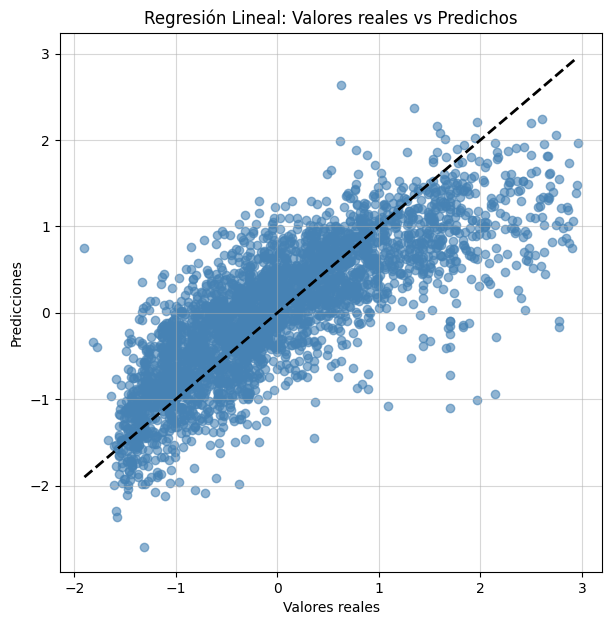

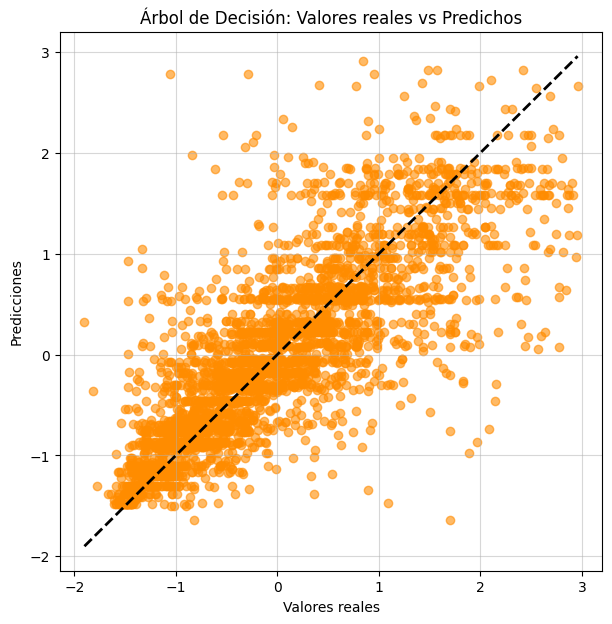

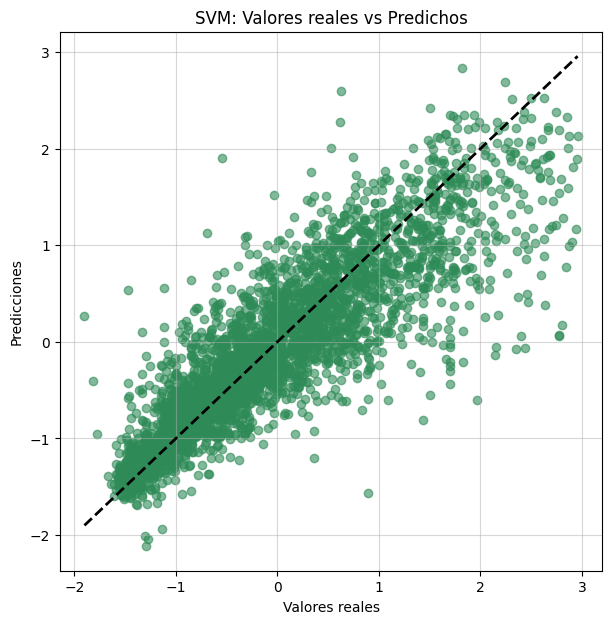

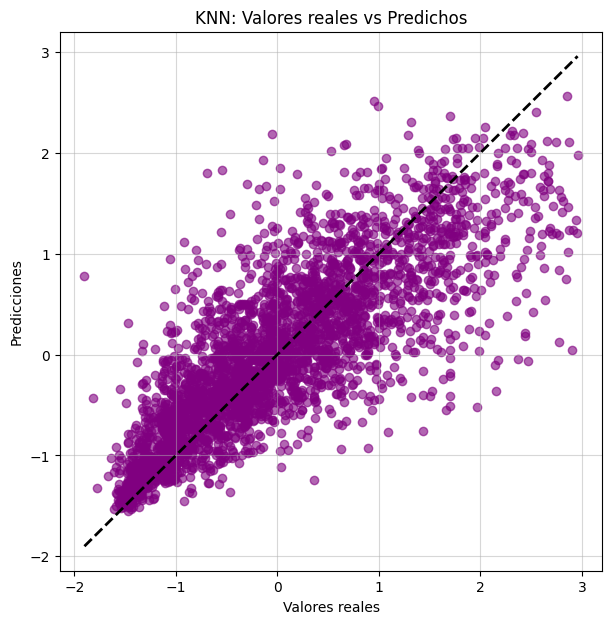

In [20]:
#Regresión lineal
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred_lr, alpha=0.6, color='steelblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Regresión Lineal: Valores reales vs Predichos')
plt.grid(alpha=0.5)
plt.show()

# Árbol de Decisión
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred_tree, alpha=0.6, color='darkorange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Árbol de Decisión: Valores reales vs Predichos')
plt.grid(alpha=0.5)
plt.show()

#SVM
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred_svm, alpha=0.6, color='seagreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('SVM: Valores reales vs Predichos')
plt.grid(alpha=0.5)
plt.show()

#KNN
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred_knn, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('KNN: Valores reales vs Predichos')
plt.grid(alpha=0.5)
plt.show()

# 8. Conclusiones
Tras aplicar y evaluar los modelos de Regresión Lineal, Árbol de Decisión, SVM y KNN sobre el conjunto de datos de California Housing, el SVM (Support Vector Machine) mostró el mejor rendimiento global, obteniendo los valores más bajos de error (MAE, MSE y RMSE). Esto indica que logra capturar de mejor manera la relación entre las variables independientes y el valor objetivo, ajustándose de forma más precisa a los datos. Los gráficos de dispersión “valores reales vs predichos” muestran que el modelo SVM tiene los puntos más concentrados alrededor de la línea de referencia, indicando una mayor precisión. En cambio, los otros modelos presentan mayor dispersión, especialmente la regresión lineal y KNN.

## Clasificación


<img src="https://miro.medium.com/v2/resize:fit:372/0*EwdH1C6ThmpwY0Qo.png" width = "400" align="center"/>

El objetivo de este proyecto es realizar la mejor predicción posible de las imágenes a partir de los datos disponibles. Para lograrlo, es necesario seguir los pasos habituales en un proyecto de _Machine Learning_, que incluyen la exploración estadística, la visualización y el preprocesamiento de los datos.

Se solicita lo siguiente:

* Ajustar al menos tres modelos de clasificación:
    * Regresión logística.
    * K-Nearest Neighbors.
    * Un algoritmo adicional o más, de libre elección. Puedes consultar [esta lista de algoritmos](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) para obtener ideas.
  
* Realizar predicciones con cada uno de los tres modelos utilizando el conjunto de datos de _test_ y calcular sus respectivas puntuaciones (_score_).

* Evaluar y analizar los resultados de los modelos utilizando las siguientes métricas de rendimiento:
    * **Accuracy**
    * **Precision**
    * **Recall**
    * **F1-score**

### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [21]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [22]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [23]:
# informacion de las columnas
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [24]:
# informacion del target
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [25]:
# leer datos
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

In [27]:
digits['target'].value_counts().sort_index()

,count
target,
0,178
1,182
2,177
3,183
4,181
5,182
6,181
7,179
8,174


Las clases tienen cerca de 180 datos por digito

In [28]:
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   c00     1797 non-null   int64
 1   c01     1797 non-null   int64
 2   c02     1797 non-null   int64
 3   c03     1797 non-null   int64
 4   c04     1797 non-null   int64
 5   c05     1797 non-null   int64
 6   c06     1797 non-null   int64
 7   c07     1797 non-null   int64
 8   c08     1797 non-null   int64
 9   c09     1797 non-null   int64
 10  c10     1797 non-null   int64
 11  c11     1797 non-null   int64
 12  c12     1797 non-null   int64
 13  c13     1797 non-null   int64
 14  c14     1797 non-null   int64
 15  c15     1797 non-null   int64
 16  c16     1797 non-null   int64
 17  c17     1797 non-null   int64
 18  c18     1797 non-null   int64
 19  c19     1797 non-null   int64
 20  c20     1797 non-null   int64
 21  c21     1797 non-null   int64
 22  c22     1797 non-null   int64
 23  c23     1797 

Hay solo un tipo de dato int64, 1797 mediciones con 65 columnas con ningun dato nulo.

In [29]:
digits.memory_usage(deep=True).sum() / 1024, "KB"

(np.float64(912.66796875), 'KB')

912.67 KB de memoria

### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [30]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`.

> **Sugerencia**: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

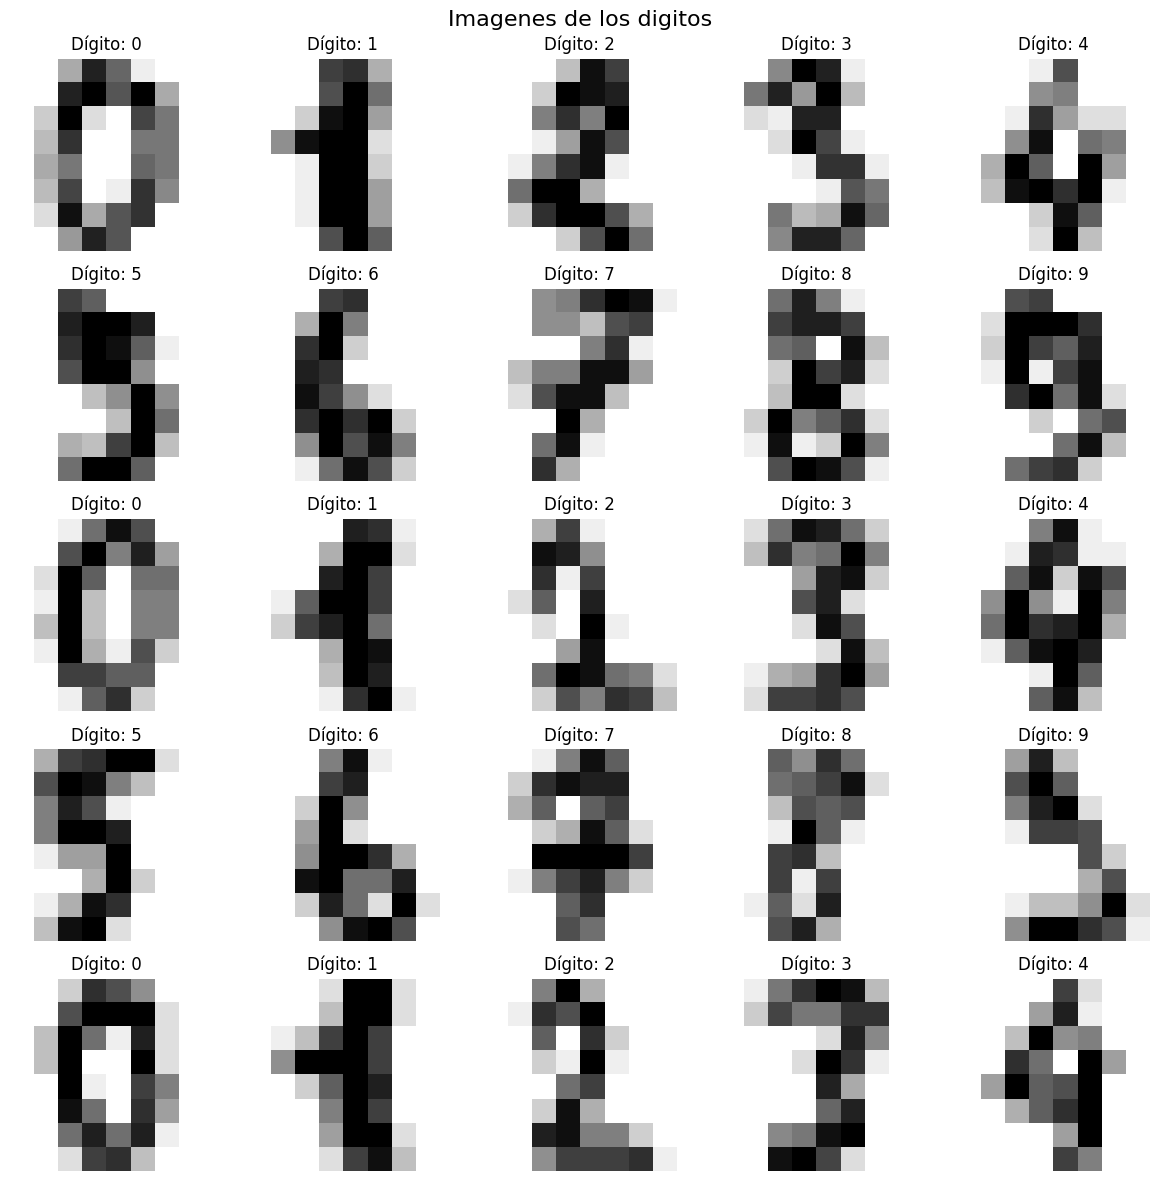

In [32]:
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))
for i in range(nx * ny):
    ax = axs[i // ny, i % ny]
    ax.imshow(digits_dict["images"][i], cmap="gray_r")
    ax.set_title(f"Dígito: {digits_dict['target'][i]}", fontsize=12)
    ax.axis("off")

plt.suptitle("Imagenes de los digitos", fontsize=16)
plt.tight_layout()
plt.show()

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test**
     * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
     * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
  
* **modelo**:
     * Instanciar el modelo objetivo desde la librería sklearn.

* **Métricas**:
     * Graficar matriz de confusión.
     * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?



--- Modelo: KNN ---
Tiempo de entrenamiento: 0.0017 s
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.92      1.00      0.96        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       0.97      0.91      0.94        35
           9       1.00      0.94      0.97        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360


--- Modelo: Random Forest ---
Tiempo de entrenamiento: 0.6193 s
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        36
           1

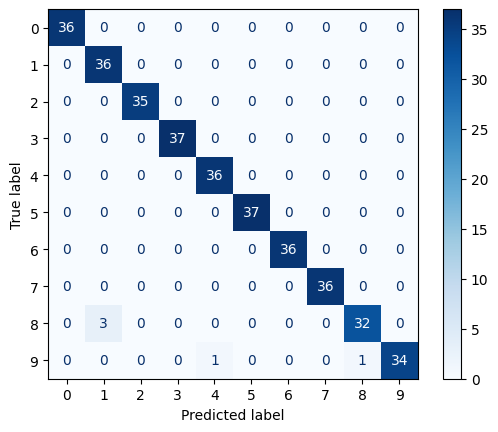

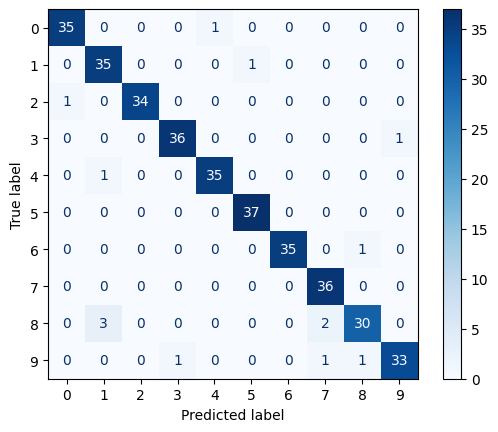

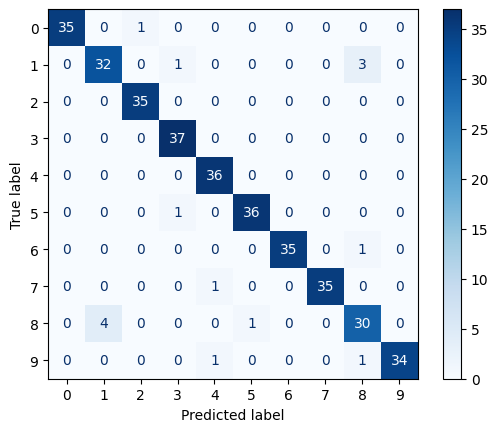

In [33]:
# features, target

X = digits.drop(columns="target").values
y = digits["target"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import time

# Lista de modelos a entrenar
modelos = {
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

for nombre, modelo in modelos.items():
    print(f"\n--- Modelo: {nombre} ---")

    # Medir tiempo de ajuste
    start_time = time.time()
    modelo.fit(X_train, y_train)
    tiempo = time.time() - start_time
    print(f"Tiempo de entrenamiento: {tiempo:.4f} s")

    # Predicción
    y_pred = modelo.predict(X_test)

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits_dict["target_names"])
    disp.plot(cmap="Blues")

    # Métricas de clasificación
    print(classification_report(y_test, y_pred))

El mejor modelo basado en las metricas fue Knn, tambien fue Knn el que demoro menos tiempon en ajustarse. Por lo tanto escoregemos Knn como modelo

### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el **mejor modelo entontrado** en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:


 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

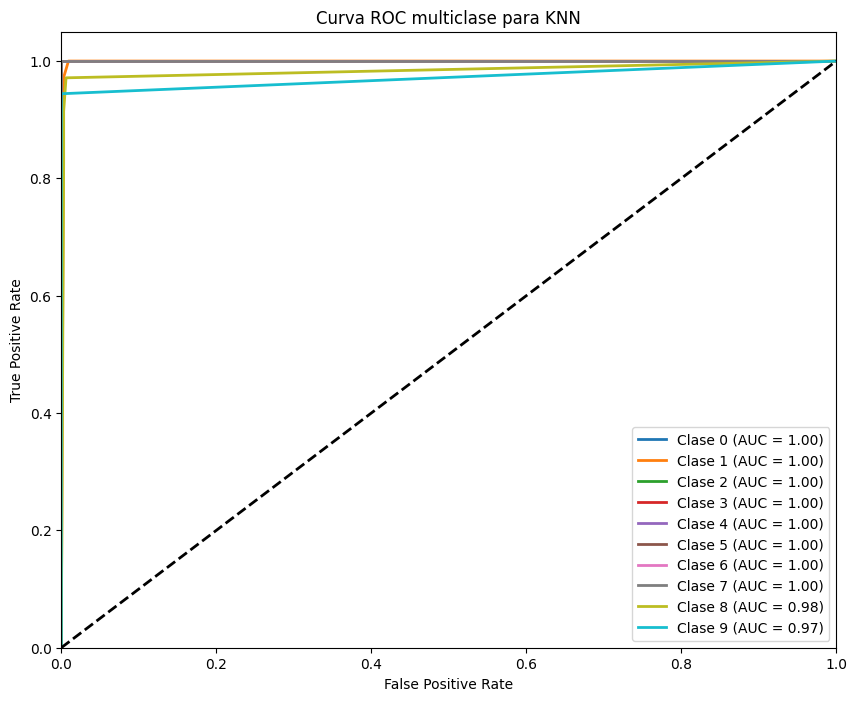

In [38]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

y_score = knn.predict_proba(X_test)

y_test_bin = label_binarize(y_test, classes=np.arange(10))

plt.figure(figsize=(10, 8))

for i in range(10):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Clase {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC multiclase para KNN')
plt.legend(loc="lower right")
plt.show()

Este modelo muestra que el modelo seleccionado es bueno y que tiene un muy buen indice de verdaderos positivos para cada clase

### Ejercicio 5


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_.

In [40]:
def mostrar_resultados(digits, model, nx=5, ny=5, label="correctos"):
    """
    Muestra los resultados de las predicciones de un modelo de clasificación en particular.
    Se toman aleatoriamente los valores de los resultados.

    - label == 'correctos': muestra los valores en los que el modelo acierta.
    - label == 'incorrectos': muestra los valores en los que el modelo no acierta.

    Observación: El modelo que se recibe como argumento no debe estar entrenado.

    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: número de filas (subplots)
    :param ny: número de columnas (subplots)
    :param label: 'correctos' o 'incorrectos'
    :return: gráficos matplotlib
    """

    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)  # Ajustar el modelo
    y_pred = model.predict(X_test)

    # Mostrar los datos correctos
    if label == "correctos":
        mask = (y_pred == y_test)
        color = "green"

    # Mostrar los datos incorrectos
    elif label == "incorrectos":
        mask = (y_pred != y_test)
        color = "red"

    else:
        raise ValueError("Valor incorrecto")

    X_aux = X_test[mask]
    y_aux_true = y_test[mask]
    y_aux_pred = y_pred[mask]

    # Mostrar los resultados
    n_samples = min(nx * ny, len(X_aux))
    indices = np.random.choice(len(X_aux), n_samples, replace=False)
    fig, ax = plt.subplots(nx, ny, figsize=(12, 12))

    for i, index in enumerate(indices):
        data = X_aux[index, :].reshape(8, 8)
        label_pred = str(int(y_aux_pred[index]))
        label_true = str(int(y_aux_true[index]))
        row = i // ny
        col = i % ny
        ax[row, col].imshow(data, interpolation='nearest', cmap='gray_r')
        ax[row, col].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
        ax[row, col].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
        ax[row, col].get_xaxis().set_visible(False)
        ax[row, col].get_yaxis().set_visible(False)

    plt.show()

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

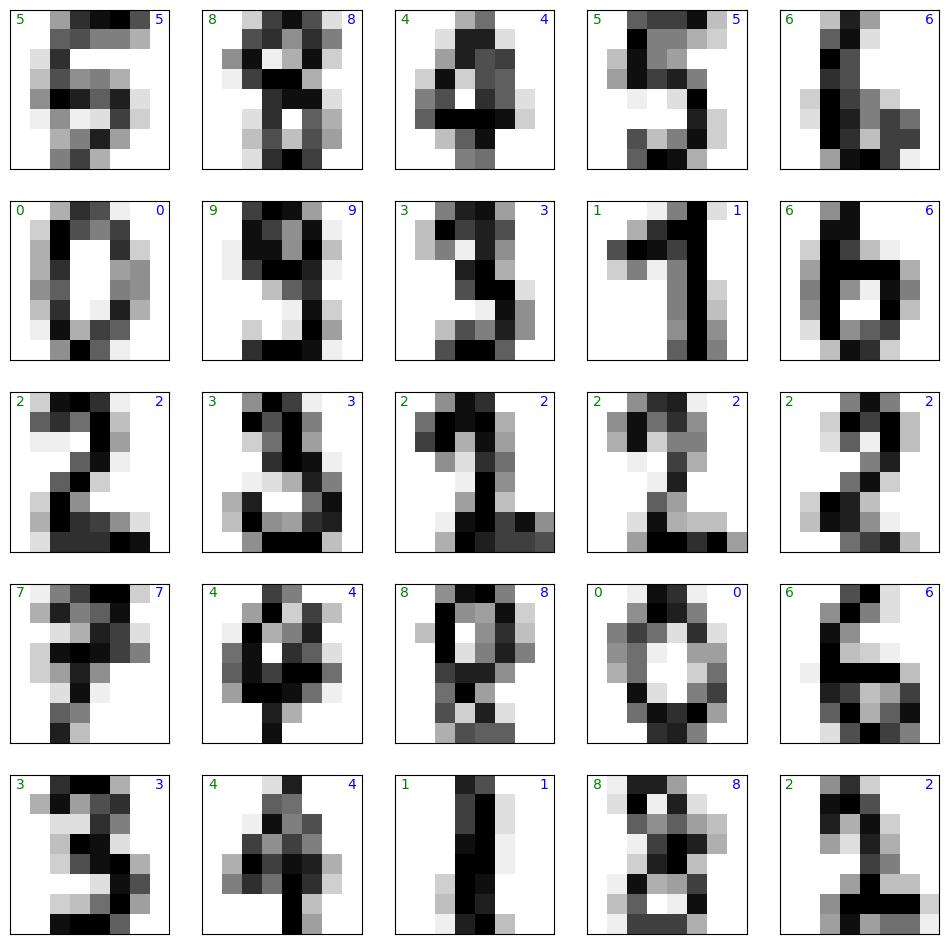

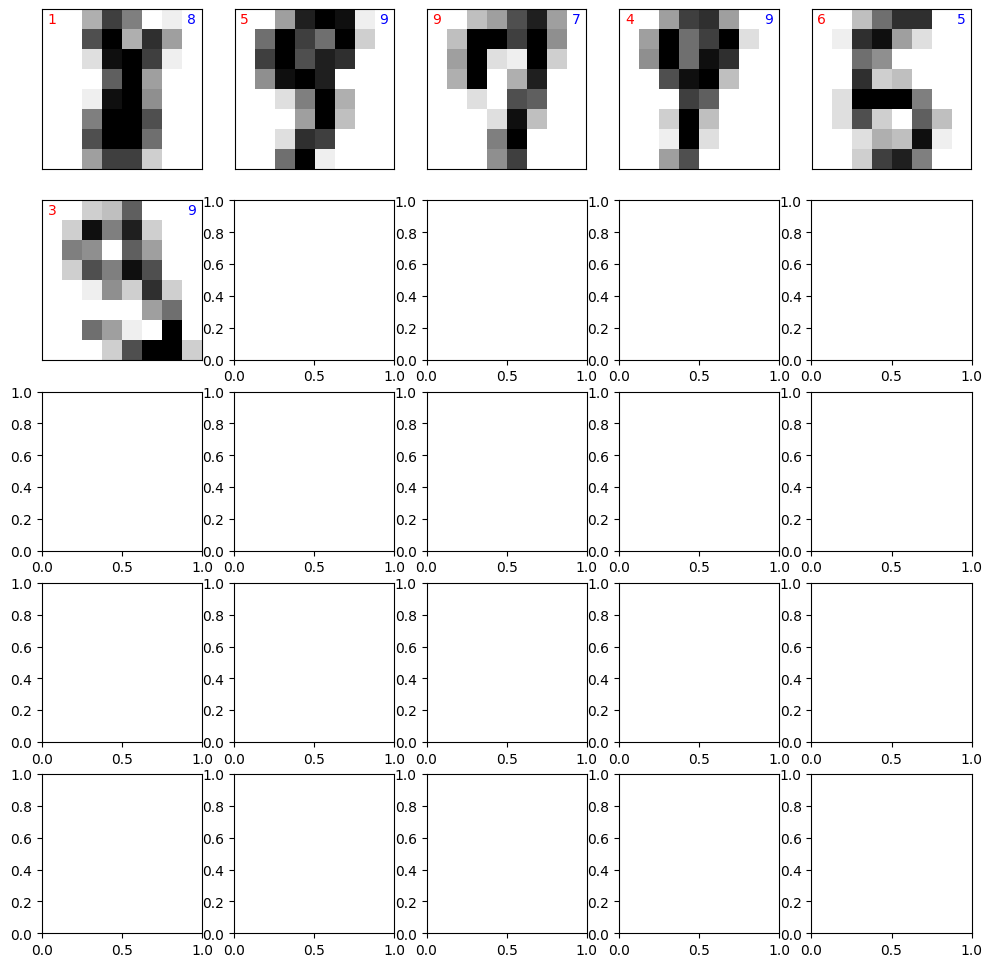

In [42]:
knn = KNeighborsClassifier(n_neighbors=3)

mostrar_resultados(digits, knn, nx=5, ny=5, label="correctos")

mostrar_resultados(digits, knn, nx=5, ny=5, label="incorrectos")

Los fallos pueden deberse a que algunos digitos escritos a mano son muy parecidos como pueden ser el 3 y el 5 KNN, se basa en distancia Euclidiana entre píxeles, por lo que si la escritura es inusual, el modelo puede confundirlos, ademas cada persona puede escribir los digitos de manera distinta que generan patrones que el modelo no ha visto en el entrenamiento, ademaás en cada imagen hay una baja resolución.

### Ejercicio 6
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

El modelo tiene excelentes métricas en general, lo que nos indica que el modelo Knn funciona muy bien para esta tarea. Las dificultades principales de este modelo radican en la perdida de información que se genera al bajar la resolución. El problema de trabajar con imagenes de mayor resolución viene en la forma de la memoria, ya que entre más precisa la imagen, más memoria consume, y para entrenar un modelo se requieren muchos datos. Como trabajo futuro podriamos aumentar el dataset con más ejemplos escritos a mano, especialmente para clases más confusas, además aumentar el número de vecinos.